# Análisis Exploratorio de Datos (EDA)

    - Autor: Peio García Pinilla
    - Fecha: Julio de 2021
    
Este notebook hace referencia al Proyecto Fin de Máster: "Modelo Machine-Learning Del Cerebelo Para Adaptación De Movimientos Oculares". En él se lleva a cabo la implementación del apartado correspondiente al Análisis Exploratorio de Datos del conjunto de datos empleado para la investigación.

In [15]:
import os
import os.path
import sys
from os import listdir
import pandas as pd
import neo
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bisect import bisect_left
from matplotlib import patches
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter1d
import smogn

In [16]:
#Lectura de datos
DF = pd.read_csv('DATAFRAME.csv')

C:\Users\peiog\anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,1,3,4,6,7,9,10,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
DF.head()

,HE,VXmax,VX,a1x,a2x,AX,VE,VYmax,VY,a1y,a2y,AY,HF,VF,T
0,-0.250244140625,-497.4365234375548,"[0, -21.362304687502352, -48.82812500000538, -...",-43288.85638356552,30689.656458034882,[-2.45414982e+04 -2.65499850e+04 -3.01040447e+...,-0.1007080078125,33.569335937503695,"[0, 3.051757812500336, 9.155273437501009, 3.05...",3972.9985068234764,-3082.6891316848905,[ 48.36681274 -252.47543047 -764.36815793 ...,-14.898681640625,0.262451171875,[0. 0.001 0.002 0.003 0.004 0.005 0.006 0.0...
1,-12.518310546875,476.07421875026387,"[0, 18.310546874993886, 39.672851562521984, 76...",36542.41317315611,-18693.506560595106,[ 19132.09864697 20593.67822894 23232.242400...,-0.1861572265625,36.62109375002029,"[0, 0.0, 0.0, 3.051757812498981, -12.207031249...",-4570.212676023605,3923.9573976704737,[-1777.76306783 -2171.52244513 -2848.35016099 ...,0.634765625,-0.2227783203125,[0. 0.001 0.002 0.003 0.004 0.005 0.006 0.0...
2,-0.445556640625,57.98339843753214,"[0, 3.0517578125016915, 21.362304687492866, 30...",7027.291420670352,-5259.004383706949,[ 6917.67780466 6993.30940217 7027.29142067 ...,-0.3997802734375,552.3681640628062,"[0, 9.155273437505073, 30.517578124989807, 61....",38158.20303280984,-23832.42322784533,[ 16276.93956436 17819.52132836 20618.798334...,0.4364013671875,14.3463134765625,[0. 0.001 0.002 0.003 0.004 0.005 0.006 0.0...
3,0.1129150390625,15.258789062508457,"[0, 12.207031250006766, 12.207031249995923, 15...",-8851.686391827747,5309.997943620423,[ 1371.54589593 761.83703619 -317.5260888 ...,11.60888671875,-527.9541015623237,"[0, -30.517578125016914, -36.62109374998777, -...",-30694.127722984675,24962.136651605142,[-16255.43567685 -17226.99106426 -19033.159000...,-1.3031005859375,-2.374267578125,[0. 0.001 0.002 0.003 0.004 0.005 0.006 0.0...
4,-0.47607421875,21.36230468751184,"[0, -9.155273437505073, 9.15527343748881, 3.05...",-5502.908600149958,4693.156201125592,[ 469.01302656 496.47332625 537.27294066 ...,-0.3509521484375,-494.384765625274,"[0, -24.414062500013532, -36.62109374995524, -...",-31920.65890218361,20626.840182478856,[-14545.91315044 -15423.21225181 -17100.494106...,-0.537109375,-13.6474609375,[0. 0.001 0.002 0.003 0.004 0.005 0.006 0.0...


In [18]:
#Forzar conversion a float
DF = DF.drop(1925)
DF["HE"] = pd.to_numeric(DF["HE"], downcast="float")
DF["VE"] = pd.to_numeric(DF["VE"], downcast="float")
DF["HF"] = pd.to_numeric(DF["HF"], downcast="float")
DF["VF"] = pd.to_numeric(DF["VF"], downcast="float")

DF["VXmax"] = pd.to_numeric(DF["VXmax"], downcast="float")
DF["VYmax"] = pd.to_numeric(DF["VYmax"], downcast="float")
DF["a1x"] = pd.to_numeric(DF["a1x"], downcast="float")
DF["a2x"] = pd.to_numeric(DF["a2x"], downcast="float")
DF["a1y"] = pd.to_numeric(DF["a1y"], downcast="float")
DF["a2y"] = pd.to_numeric(DF["a2y"], downcast="float")

In [19]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119675 entries, 0 to 119675
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   HE      119675 non-null  float32
 1   VXmax   119675 non-null  float32
 2   VX      119675 non-null  object 
 3   a1x     119675 non-null  float32
 4   a2x     119675 non-null  float32
 5   AX      119675 non-null  object 
 6   VE      119675 non-null  float32
 7   VYmax   119675 non-null  float32
 8   VY      119675 non-null  object 
 9   a1y     119675 non-null  float32
 10  a2y     119675 non-null  float32
 11  AY      119675 non-null  object 
 12  HF      119675 non-null  float32
 13  VF      119675 non-null  float32
 14  T       119675 non-null  object 
dtypes: float32(10), object(5)
memory usage: 10.0+ MB


In [20]:
#Descripcion estadistica del conjunto
DF.describe()

,HE,VXmax,a1x,a2x,VE,VYmax,a1y,a2y,HF,VF
count,119675.000000,119675.000000,119675.000000,119675.000000,119675.000000,119675.000000,119675.000000,119675.000000,119675.000000,119675.000000
mean,0.461915,49.958611,119.563629,-497.493256,0.299125,62.817532,-923.514893,1369.490234,0.586726,0.570995
std,6.839849,319.060913,26835.580078,16692.509766,6.259717,317.166809,26505.679688,20585.015625,7.831597,6.966220
min,-33.590698,-991.821289,-93491.617188,-246156.359375,-39.434814,-1153.564453,-95799.015625,-98928.453125,-35.086060,-40.057373
25%,-4.293823,-253.295898,-23777.328125,-13820.066406,-4.016113,-94.604492,-20398.940430,-12686.406250,-5.627441,-3.976440
50%,0.024414,51.879883,2961.233643,-3004.374512,0.057983,61.035156,-1194.697388,1250.109863,0.204468,0.384521
75%,5.108643,323.486328,23547.005859,13303.770020,4.461670,302.124023,18881.699219,14287.741699,6.643677,5.535889
max,48.254395,9109.497070,359669.906250,201533.781250,38.787842,1150.512695,131599.437500,91300.796875,47.763062,39.025879


In [21]:
#Comprobar si existen valores nulos
DF.isnull().sum()

HE       0
VXmax    0
VX       0
a1x      0
a2x      0
AX       0
VE       0
VYmax    0
VY       0
a1y      0
a2y      0
AY       0
HF       0
VF       0
T        0
dtype: int64

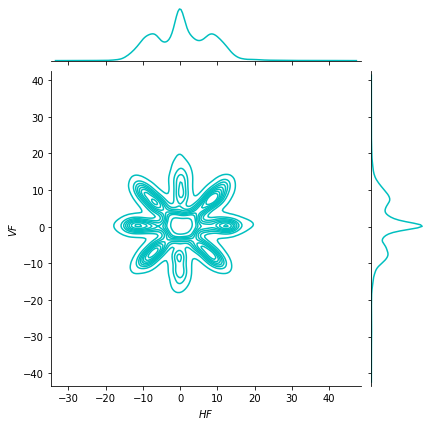

In [22]:
#Grafico Vmax y posicion final
DF_aux = DF.sample(frac=0.5,random_state=0)
g = sns.jointplot(x="HF", y="VF", data = DF_aux, kind="kde", color="c")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.set_axis_labels("$HF$", "$VF$")

array([[<AxesSubplot:title={'center':'HE'}>,
        <AxesSubplot:title={'center':'VXmax'}>,
        <AxesSubplot:title={'center':'a1x'}>],
       [<AxesSubplot:title={'center':'a2x'}>,
        <AxesSubplot:title={'center':'VE'}>,
        <AxesSubplot:title={'center':'VYmax'}>],
       [<AxesSubplot:title={'center':'a1y'}>,
        <AxesSubplot:title={'center':'a2y'}>,
        <AxesSubplot:title={'center':'HF'}>],
       [<AxesSubplot:title={'center':'VF'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

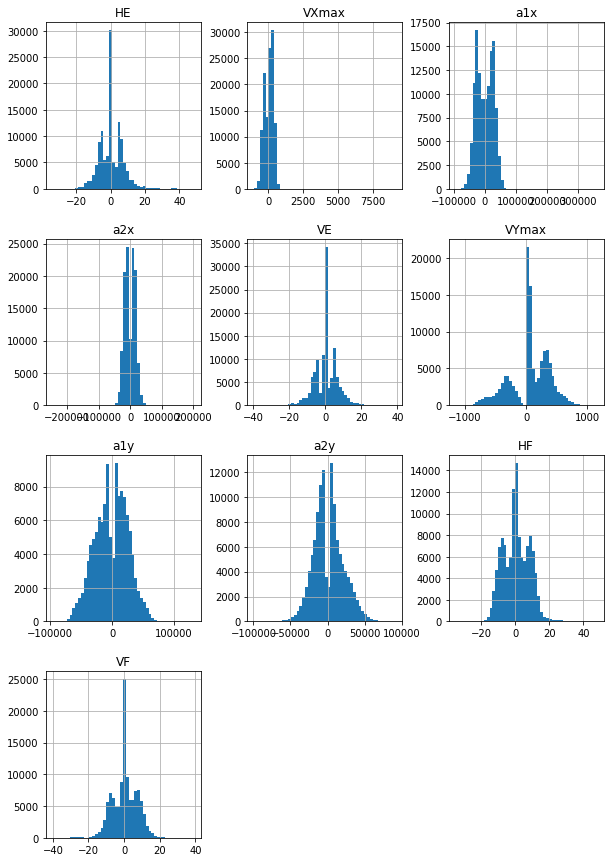

In [23]:
#Distribuciones de los valores numéricos
c = DF.drop(['VX','VY','AX','AY','T'], axis=1)
c.hist(bins=50, figsize=(10,15))

C:\Users\peiog\anaconda3\envs\env\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='VYmax', ylabel='VXmax'>

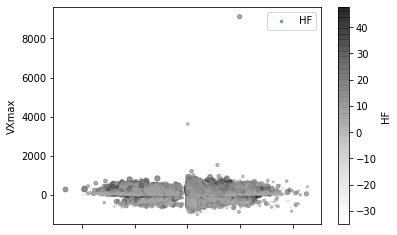

In [24]:
#Distribucion posición final vs vel
DF.plot(kind="scatter", x= "VYmax", y="VXmax", alpha = 0.6, s=DF["HF"], label = "HF", c = "HF")

array([[<AxesSubplot:xlabel='HE', ylabel='HE'>,
        <AxesSubplot:xlabel='VXmax', ylabel='HE'>,
        <AxesSubplot:xlabel='a1x', ylabel='HE'>,
        <AxesSubplot:xlabel='a2x', ylabel='HE'>,
        <AxesSubplot:xlabel='VE', ylabel='HE'>,
        <AxesSubplot:xlabel='VYmax', ylabel='HE'>,
        <AxesSubplot:xlabel='a1y', ylabel='HE'>,
        <AxesSubplot:xlabel='a2y', ylabel='HE'>,
        <AxesSubplot:xlabel='HF', ylabel='HE'>,
        <AxesSubplot:xlabel='VF', ylabel='HE'>],
       [<AxesSubplot:xlabel='HE', ylabel='VXmax'>,
        <AxesSubplot:xlabel='VXmax', ylabel='VXmax'>,
        <AxesSubplot:xlabel='a1x', ylabel='VXmax'>,
        <AxesSubplot:xlabel='a2x', ylabel='VXmax'>,
        <AxesSubplot:xlabel='VE', ylabel='VXmax'>,
        <AxesSubplot:xlabel='VYmax', ylabel='VXmax'>,
        <AxesSubplot:xlabel='a1y', ylabel='VXmax'>,
        <AxesSubplot:xlabel='a2y', ylabel='VXmax'>,
        <AxesSubplot:xlabel='HF', ylabel='VXmax'>,
        <AxesSubplot:xlabel='VF', ylabel

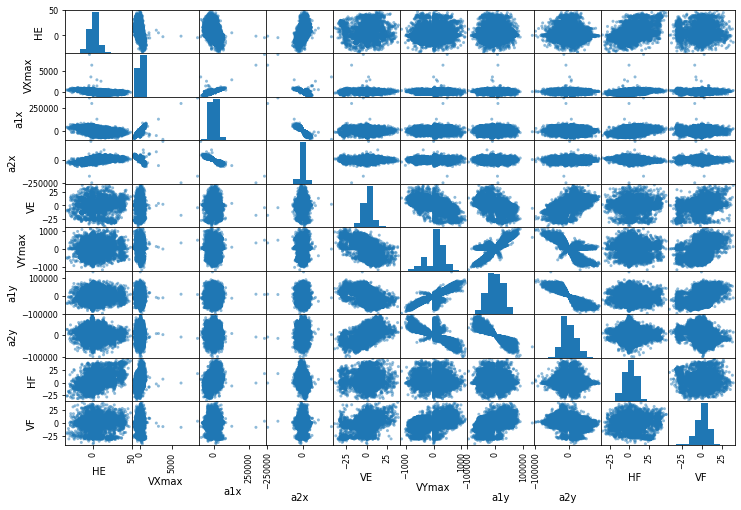

In [25]:
#Correlacion por pares
pd.plotting.scatter_matrix(c, figsize=(12,8))

<AxesSubplot:>

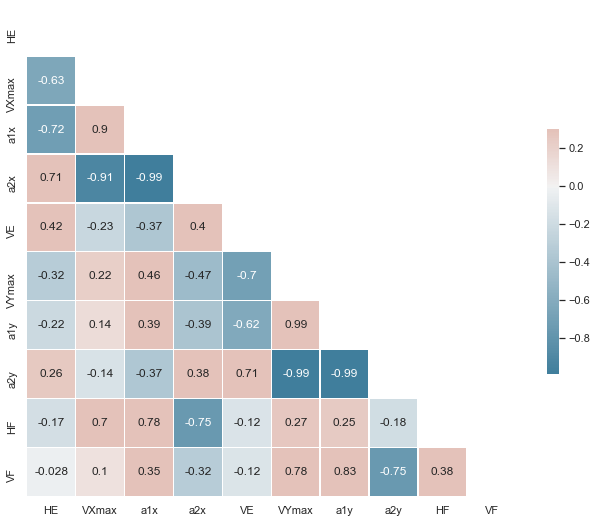

In [26]:
#Matriz de correlacion
c = DF.drop(['VX','VY','AX','AY','T'], axis=1)
sns.set_theme(style="white")
corr = c[0:10].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot = True,cbar_kws={"shrink": .5})

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Eje vertical')

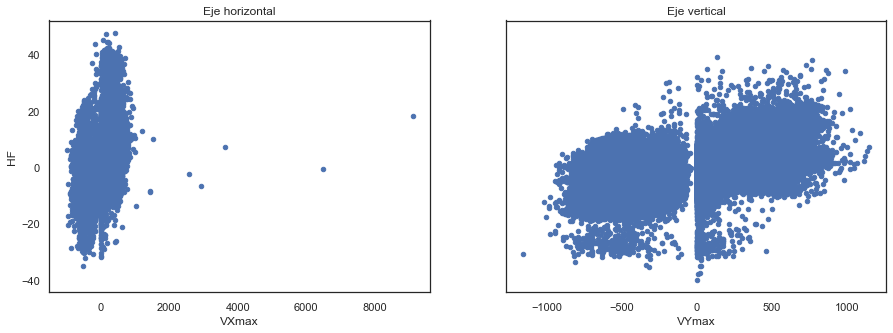

In [27]:
## Corr Vmax VS pos final
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
# Horizontal
DF.plot.scatter(ax=axes[0],x='VXmax',y='HF')
axes[0].set_title('Eje horizontal')
# Vertical
DF.plot.scatter(ax=axes[1],x='VYmax',y='VF')
axes[1].set_title('Eje vertical')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='VYmax', ylabel='HF'>

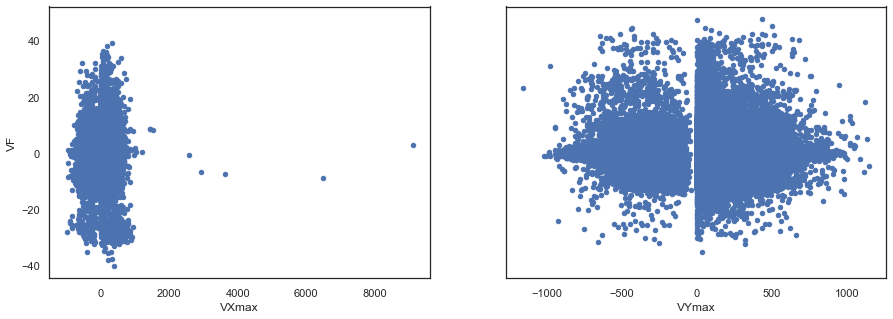

In [28]:
## Corr Vmax VS pos final invertida
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
# Horizontal
DF.plot.scatter(ax=axes[0],x='VXmax',y='VF')
# Vertical
DF.plot.scatter(ax=axes[1],x='VYmax',y='HF')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

<AxesSubplot:xlabel='a2y', ylabel='VF'>

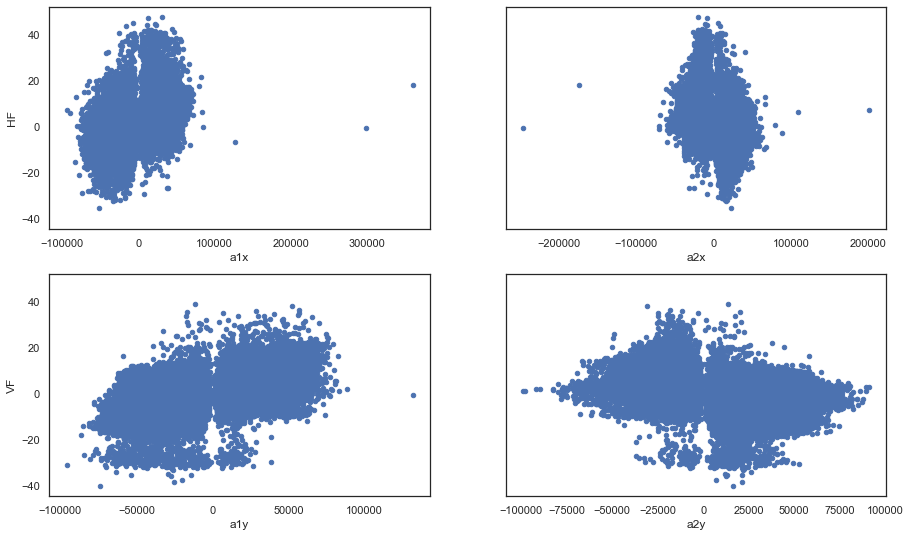

In [29]:
## Corr acel VS pos final
fig, axes = plt.subplots(2, 2, figsize=(15, 9), sharey=True)
# Horizontal
DF.plot.scatter(ax=axes[0][0],x='a1x',y='HF')
DF.plot.scatter(ax=axes[0][1],x='a2x',y='HF')
# Vertical
DF.plot.scatter(ax=axes[1][0],x='a1y',y='VF')
DF.plot.scatter(ax=axes[1][1],x='a2y',y='VF')

In [ ]:
# Preprocesamiento y balanceo de los datos
# REDUCCION DE DIMENSIONALIDAD DEL CONJUNTO -> Balancear, eliminar atributos, etc
#Balancear conjunto de datos -> OVER SAMPLING DE ATRIBUTOS y EJEMPLOS
DF_x = smogn.smoter(
    data = c.drop(['VF'], axis=1), 
    y = "HF"
)
DF_y = smogn.smoter(
    data = c.drop(['HF'], axis=1), 
    y = "VF"
)
DF_x #En r_index los ejemplos